<a href="https://colab.research.google.com/github/DhruvaShetty10/Dsa_Project/blob/main/SMS_Spam_Detection_using_Machine_Learning_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import kagglehub
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/uciml/sms-spam-collection-dataset/versions/1


In [17]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords

In [18]:
import pandas as pd
df = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [19]:
df = df[['v2', 'v1']]
df = df.rename(columns={'v2': 'messages', 'v1': 'label'})
df.head()

,messages,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [20]:
df.isnull().sum()

,0
messages,0
label,0


In [24]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

STOPWORDS = set(stopwords.words('english'))

def clean_text(text):

    text = text.lower()

    text = re.sub(r'[^a-zA-Z\s]', '', text)

    text = re.sub(r'\s+', ' ', text).strip()

    text = " ".join(word for word in text.split() if word not in STOPWORDS)
    return text




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
df['clean_text'] = df['messages'].apply(clean_text)
df.head()


,messages,label,clean_text
0,"Go until jurong point, crazy.. Available only ...",ham,go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,ham,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,free entry wkly comp win fa cup final tkts st ...
3,U dun say so early hor... U c already then say...,ham,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",ham,nah dont think goes usf lives around though


In [26]:
X = df['clean_text']
y = df['label']

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

def evaluate_model(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)
    pipeline = Pipeline([
        ('vectorizer', CountVectorizer()),
        ('transformer', TfidfTransformer()),
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)

    print(f'Accuracy: {pipeline.score(X_test, y_test) * 100:.2f}%')
    y_pred = pipeline.predict(X_test)
    print(classification_report(y_test, y_pred))

In [28]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
evaluate_model(model, X, y)

Accuracy: 95.87%
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1448
        spam       0.98      0.71      0.82       224

    accuracy                           0.96      1672
   macro avg       0.97      0.85      0.90      1672
weighted avg       0.96      0.96      0.96      1672



In [29]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
evaluate_model(model, X, y)

Accuracy: 96.23%
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1448
        spam       0.99      0.72      0.84       224

    accuracy                           0.96      1672
   macro avg       0.98      0.86      0.91      1672
weighted avg       0.96      0.96      0.96      1672



In [30]:
from sklearn.svm import SVC

model = SVC(C=3)
evaluate_model(model, X, y)

Accuracy: 98.33%
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1448
        spam       0.99      0.88      0.93       224

    accuracy                           0.98      1672
   macro avg       0.99      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672



In [31]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
evaluate_model(model, X, y)

Accuracy: 97.43%
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1448
        spam       1.00      0.81      0.89       224

    accuracy                           0.97      1672
   macro avg       0.99      0.90      0.94      1672
weighted avg       0.98      0.97      0.97      1672



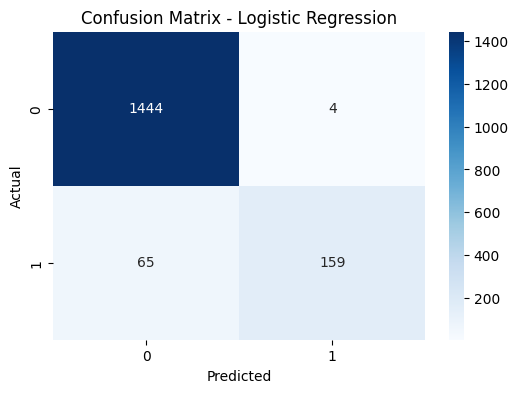

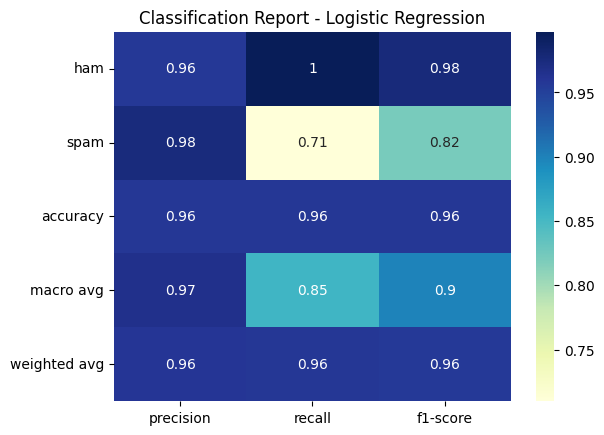

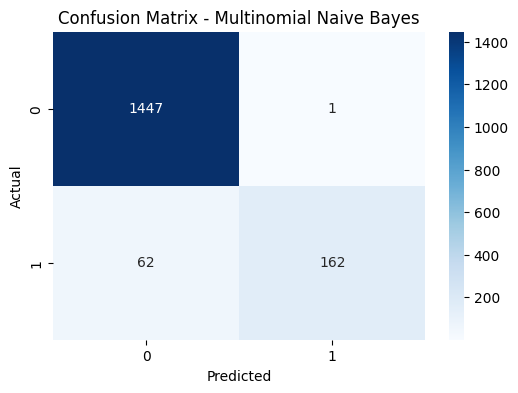

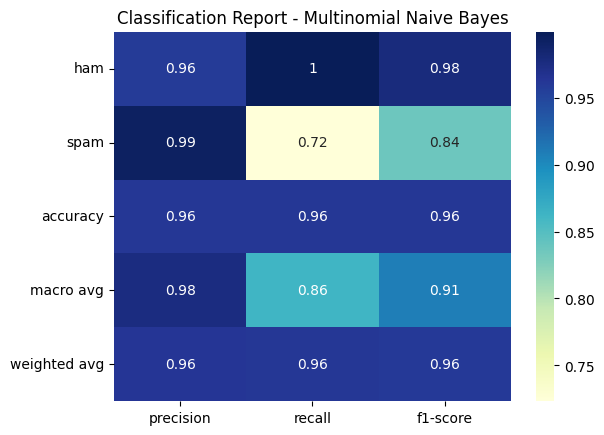

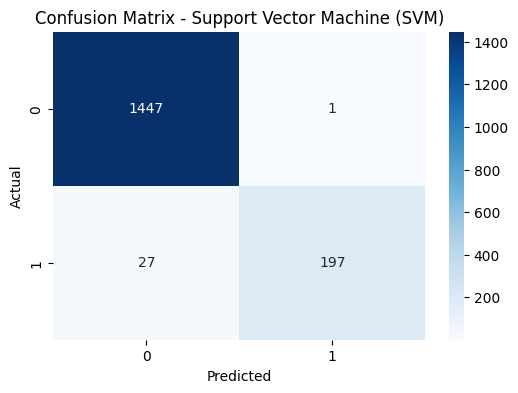

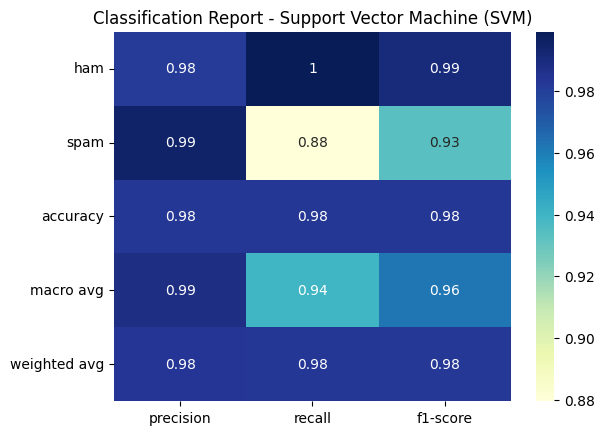

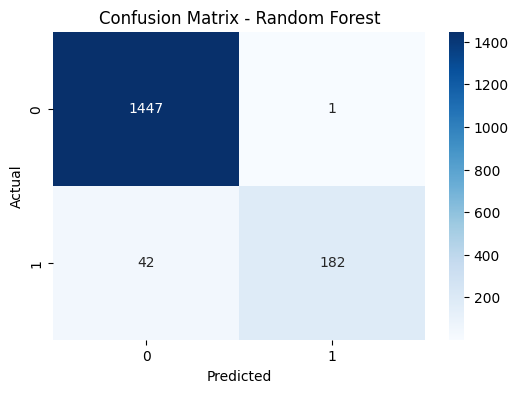

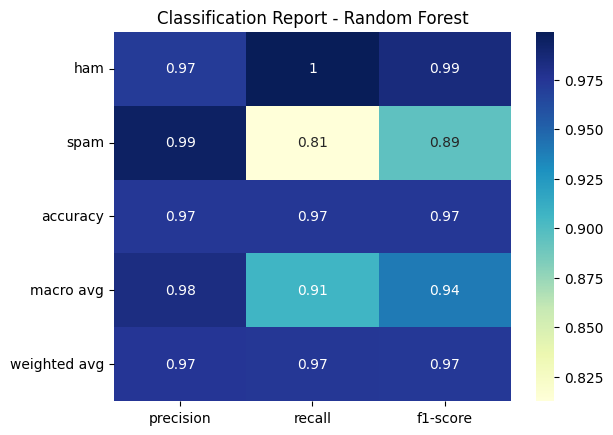

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def plot_classification_report(y_test, y_pred, title):
    report = classification_report(y_test, y_pred, output_dict=True)
    sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='YlGnBu')
    plt.title(f'Classification Report - {title}')
    plt.show()


from sklearn.linear_model import LogisticRegression
pipeline_lr = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression())
])
pipeline_lr.fit(x_train, y_train)
y_pred_lr = pipeline_lr.predict(x_test)
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression")
plot_classification_report(y_test, y_pred_lr, "Logistic Regression")


from sklearn.naive_bayes import MultinomialNB
pipeline_nb = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])
pipeline_nb.fit(x_train, y_train)
y_pred_nb = pipeline_nb.predict(x_test)
plot_confusion_matrix(y_test, y_pred_nb, "Multinomial Naive Bayes")
plot_classification_report(y_test, y_pred_nb, "Multinomial Naive Bayes")


from sklearn.svm import SVC
pipeline_svm = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SVC(C=3))
])
pipeline_svm.fit(x_train, y_train)
y_pred_svm = pipeline_svm.predict(x_test)
plot_confusion_matrix(y_test, y_pred_svm, "Support Vector Machine (SVM)")
plot_classification_report(y_test, y_pred_svm, "Support Vector Machine (SVM)")


from sklearn.ensemble import RandomForestClassifier
pipeline_rf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier())
])
pipeline_rf.fit(x_train, y_train)
y_pred_rf = pipeline_rf.predict(x_test)
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
plot_classification_report(y_test, y_pred_rf, "Random Forest")
